## Comparação de uma carteira qualquer com o IBOV

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [13]:
ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','KNRI11.SA',
          'SMAL11.SA','AAPL34.SA','IVVB11.SA',
          'ETH-USD','USDBRL=X']

In [16]:
inicio = '2020-05-01'
fim = '2021-08-24'

In [17]:
precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### converter a cotação do Ethereum para reais

In [19]:
precos['ETH-BRL'] = precos['ETH-USD']*precos['USDBRL=X']

Agora podemos remover as colunas do Ethereum em dólares e da cotação do dólar

In [20]:
precos = precos.drop(columns=['ETH-USD', 'USDBRL=X'])
precos.to_csv('Dados.csv', sep = ';', decimal=',')

Normalizaçãp do preço dos ativos para visualizar seus desempenhos

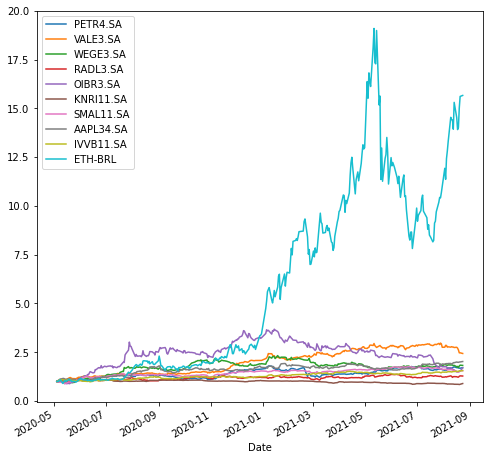

In [23]:
normalizado = precos/precos.iloc[0]

normalizado.plot(figsize = (8,8));

### Simulação de uma carteira vs. IBOV

In [24]:
compras = {'PETR4.SA': 1000, 'VALE3.SA': 700, 'WEGE3.SA': 1500, 
           'RADL3.SA': 700, 'OIBR3.SA': 200, 'KNRI11.SA': 700, 
           'SMAL11.SA': 1500, 'AAPL34.SA': 2000, 'IVVB11.SA': 1500, 
           'ETH-BRL': 200}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Qual o valor total da nossa carteira?

In [26]:
sum(compras.values())

10000

Obtendo preços dos ativos no primeiro dia do investimento

In [27]:
primeiro = precos.iloc[0]

Quantidade de papéis comprados de cada ativo

In [29]:
qtd_acoes = compras_df/primeiro

Criando uma coluna que contém a posição consolidada da nossa carteira diariamente

In [30]:
PL = precos*qtd_acoes
PL

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,1500.000000,2000.000000,1500.000000,200.000000
2020-05-05,1032.220942,696.335145,1468.750077,696.987266,205.882347,702.685457,1479.377360,2059.369092,1526.950431,200.962154
2020-05-06,994.246287,706.373849,1461.972925,693.037488,205.882347,717.231473,1462.333842,2137.167547,1548.315577,199.662245
2020-05-07,1003.452294,733.781045,1471.761915,694.175550,197.058826,716.112603,1431.655459,2199.999904,1622.340455,212.823946
2020-05-08,1063.291010,778.397449,1439.759253,700.803357,202.941174,727.301798,1433.359785,2220.108496,1602.393646,217.769114
...,...,...,...,...,...,...,...,...,...,...
2021-08-17,1703.360021,1892.935922,2648.266309,855.407316,299.999991,594.955253,2217.361714,3962.566074,2256.649004,2781.549609
2021-08-18,1688.235773,1829.425487,2563.528243,852.039530,297.058818,595.134311,2220.259080,3953.062068,2273.936211,2804.717612
2021-08-19,1678.783015,1725.048521,2686.437141,883.022843,299.999991,587.659845,2275.309569,3985.574804,2308.422157,3002.797046


In [31]:
PL['PL Total'] = PL.iloc[:].sum(axis = 1)
PL

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,1500.000000,2000.000000,1500.000000,200.000000,10000.000000
2020-05-05,1032.220942,696.335145,1468.750077,696.987266,205.882347,702.685457,1479.377360,2059.369092,1526.950431,200.962154,10069.520270
2020-05-06,994.246287,706.373849,1461.972925,693.037488,205.882347,717.231473,1462.333842,2137.167547,1548.315577,199.662245,10126.223581
2020-05-07,1003.452294,733.781045,1471.761915,694.175550,197.058826,716.112603,1431.655459,2199.999904,1622.340455,212.823946,10283.161998
2020-05-08,1063.291010,778.397449,1439.759253,700.803357,202.941174,727.301798,1433.359785,2220.108496,1602.393646,217.769114,10386.125081
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,1703.360021,1892.935922,2648.266309,855.407316,299.999991,594.955253,2217.361714,3962.566074,2256.649004,2781.549609,19213.051213
2021-08-18,1688.235773,1829.425487,2563.528243,852.039530,297.058818,595.134311,2220.259080,3953.062068,2273.936211,2804.717612,19077.397132
2021-08-19,1678.783015,1725.048521,2686.437141,883.022843,299.999991,587.659845,2275.309569,3985.574804,2308.422157,3002.797046,19433.054932


Obtendo dados do IBOV para comparar com a nossa carteira

In [32]:
ibov = yf.download('^BVSP', start = inicio, end = fim)
ibov

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-04,80501.0,80502.0,77640.0,78876.0,78876.0,8594200
2020-05-05,78887.0,81066.0,78886.0,79471.0,79471.0,9154700
2020-05-06,79473.0,79996.0,78056.0,79064.0,79064.0,9775900
2020-05-07,79072.0,80061.0,78061.0,78119.0,78119.0,13808900
2020-05-08,78152.0,80557.0,78152.0,80263.0,80263.0,10734400
...,...,...,...,...,...,...
2021-08-17,119179.0,119179.0,116248.0,117904.0,117904.0,11218200
2021-08-18,117904.0,118739.0,116489.0,116643.0,116643.0,11745800
2021-08-19,116641.0,117453.0,114801.0,117165.0,117165.0,10525900


In [33]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)
ibov

,IBOV
Date,
2020-05-04,78876.0
2020-05-05,79471.0
2020-05-06,79064.0
2020-05-07,78119.0
2020-05-08,80263.0
...,...
2021-08-17,117904.0
2021-08-18,116643.0
2021-08-19,117165.0


In [34]:
df = pd.merge(ibov,PL, on='Date')
df

,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,
2020-05-04,78876.0,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,1500.000000,2000.000000,1500.000000,200.000000,10000.000000
2020-05-05,79471.0,1032.220942,696.335145,1468.750077,696.987266,205.882347,702.685457,1479.377360,2059.369092,1526.950431,200.962154,10069.520270
2020-05-06,79064.0,994.246287,706.373849,1461.972925,693.037488,205.882347,717.231473,1462.333842,2137.167547,1548.315577,199.662245,10126.223581
2020-05-07,78119.0,1003.452294,733.781045,1471.761915,694.175550,197.058826,716.112603,1431.655459,2199.999904,1622.340455,212.823946,10283.161998
2020-05-08,80263.0,1063.291010,778.397449,1439.759253,700.803357,202.941174,727.301798,1433.359785,2220.108496,1602.393646,217.769114,10386.125081
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,117904.0,1703.360021,1892.935922,2648.266309,855.407316,299.999991,594.955253,2217.361714,3962.566074,2256.649004,2781.549609,19213.051213
2021-08-18,116643.0,1688.235773,1829.425487,2563.528243,852.039530,297.058818,595.134311,2220.259080,3953.062068,2273.936211,2804.717612,19077.397132
2021-08-19,117165.0,1678.783015,1725.048521,2686.437141,883.022843,299.999991,587.659845,2275.309569,3985.574804,2308.422157,3002.797046,19433.054932


In [35]:
PL_normalizado = df/df.iloc[0]
PL_normalizado

,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,
2020-05-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-05,1.007543,1.032221,0.994764,0.979167,0.995696,1.029412,1.003836,0.986252,1.029685,1.017967,1.004811,1.006952
2020-05-06,1.002383,0.994246,1.009105,0.974649,0.990054,1.029412,1.024616,0.974889,1.068584,1.032210,0.998311,1.012622
2020-05-07,0.990403,1.003452,1.048259,0.981175,0.991679,0.985294,1.023018,0.954437,1.100000,1.081560,1.064120,1.028316
2020-05-08,1.017585,1.063291,1.111996,0.959840,1.001148,1.014706,1.039003,0.955573,1.110054,1.068262,1.088846,1.038613
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,1.494802,1.703360,2.704194,1.765511,1.222010,1.500000,0.849936,1.478241,1.981283,1.504433,13.907748,1.921305
2021-08-18,1.478815,1.688236,2.613465,1.709019,1.217199,1.485294,0.850192,1.480173,1.976531,1.515957,14.023588,1.907740
2021-08-19,1.485433,1.678783,2.464355,1.790958,1.261461,1.500000,0.839514,1.516873,1.992787,1.538948,15.013985,1.943305


Podemos observar que nossa carteira teórica, montada pelos ativos descritos anteriomentes e seus respectivos pesos, bate o IBOV (tem um retorno maior). Esse exercício de montar carteiras a partir de um racional, e olhar como ela teria se comportado no passado, se chama backtest. Portanto, pelo nosso backtest, nossa carteira bate o IBOV.

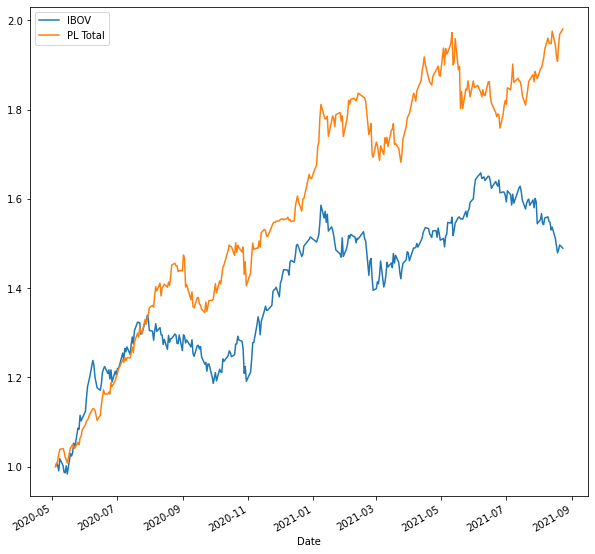

In [36]:
PL_normalizado[['IBOV', 'PL Total']].plot(figsize = (10,10));

Referência:

Gomes, Victor (2021), “Comparação de carteira com Ibov usando python published at the “Open Code Community” ”, Mendeley Data, V1, doi: 10.17632/49knfhr5t5.1